In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from tf_tsallis_statistics import *
print("Load packages")

Load packages


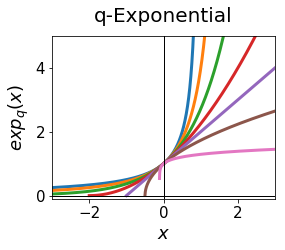

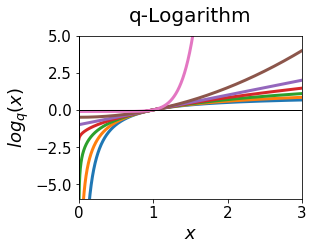

In [68]:
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

q_list = [0.0,0.5,1,1.5,2.0,3.0,10.0]
x_list = np.linspace(-3,3,num=10000)

plt.figure(figsize=(4,3))
for q in q_list:
    exp_q_list = np_exp_q(x_list,q=2-q)
    exp_q_list[exp_q_list==0] == np.nan
    plt.plot(x_list,exp_q_list,label="q={:.01f}".format(q),lw=3)

plt.title("q-Exponential",size=BIGGER_SIZE,y=1.05)
plt.axhline(0, color='k',linewidth=1)
plt.axvline(0, color='k',linewidth=1)
plt.xlim([np.min(x_list),np.max(x_list)])
plt.xlabel(r"$x$")
plt.ylim([-0.1,5.0])
plt.ylabel(r"$exp_q(x)$")
# plt.legend()
plt.show()

plt.figure(figsize=(4,3))
for q in q_list:
    log_q_list = np_log_q(x_list,q=2-q)
    log_q_list[log_q_list==0] == np.nan
    plt.plot(x_list,log_q_list,label="q={:.01f}".format(q),lw=3)

plt.title("q-Logarithm",size=BIGGER_SIZE,y=1.05)
plt.axhline(0, color='k',linewidth=1)
plt.axvline(0, color='k',linewidth=1)
plt.xlim([0,np.max(x_list)])
plt.xlabel(r"$x$")
plt.ylim([-6.0,5.0])
plt.ylabel(r"$log_q(x)$")
# plt.legend()
plt.show()

/root/tsallis_actor_critic_mujoco/spinup/algos/tac/tf_tsallis_statistics.py:24: RuntimeWarning: invalid value encountered in multiply
  q_ent_val = np.sum(-p*np_log_q(p,q=q),axis=1)


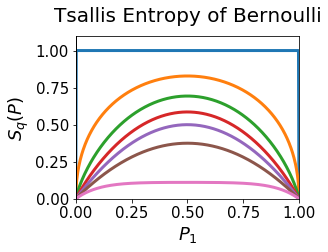

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


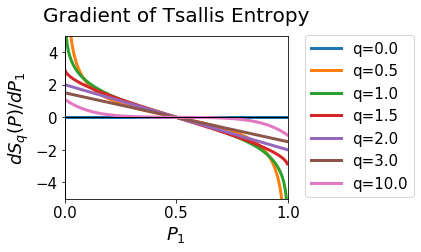

In [69]:
p1 = np.linspace(0,1,num=450)
p1 = p1[:,np.newaxis]
p = np.concatenate([p1,1-p1],axis=1)

plt.figure(figsize=(4,3))
for q in q_list:
    p_q_entropy = np_q_entropy(p,q=2-q)
    plt.plot(p1,p_q_entropy,label="q={:.01f}".format(q),lw=3)

plt.title("Tsallis Entropy of Bernoulli",size=BIGGER_SIZE,y=1.05)
plt.axhline(0, color='k',linewidth=1)
plt.axvline(0, color='k',linewidth=1)
plt.xlabel('$P_1$')
plt.xlim([0.0,1.])
plt.ylabel(r"$S_q(P)$")
plt.ylim([0,1.1])
plt.show()

plt.figure(figsize=(4,3))
for q in q_list:
    grad_p_q_entropy = -q*np_log_q(p1,q=2-q)+q*np_log_q(1-p1,q=2-q)
    plt.plot(p1,grad_p_q_entropy,label="q={:.01f}".format(q),lw=3)
    
plt.title("Gradient of Tsallis Entropy",size=BIGGER_SIZE,y=1.05)
plt.axhline(0, color='k',linewidth=1)
plt.axvline(0, color='k',linewidth=1)
plt.xlim([0.,1.])
plt.xticks([0.,0.5,1.])
plt.ylim([-5,5])
plt.xlabel('$P_1$')
plt.ylabel(r"$d S_q(P) / dP_1$")
plt.legend(loc="upper center",bbox_to_anchor=(1.32, 1.05))
plt.show()

/root/tsallis_actor_critic_mujoco/spinup/algos/tac/tf_tsallis_statistics.py:35: RuntimeWarning: divide by zero encountered in power
  obj = lambda x: -np.sum((q_logit-max_q_logit)*x) + np.sum(x*(x**(1-q)-1)/(1-q))
/root/tsallis_actor_critic_mujoco/spinup/algos/tac/tf_tsallis_statistics.py:35: RuntimeWarning: invalid value encountered in multiply
  obj = lambda x: -np.sum((q_logit-max_q_logit)*x) + np.sum(x*(x**(1-q)-1)/(1-q))


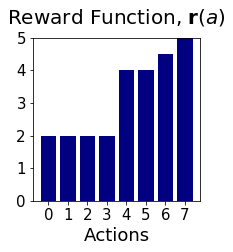

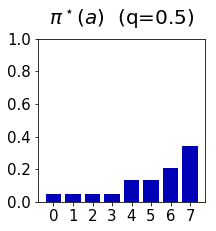

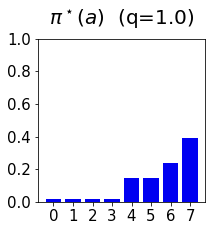

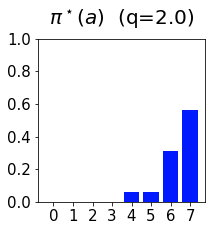

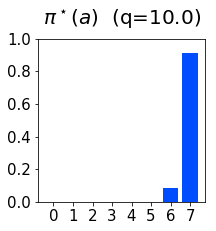

In [70]:
k = 8
max_q_logits = 5
q_logits = max_q_logits*np.concatenate([0.4*np.ones([1,4]),0.8*np.ones([1,2]),0.9*np.ones([1,1]),[[1]]],axis=1)

q_list = [0.5, 1.0,2.0,10.0]
cmap = cm.get_cmap('jet')
color_list=cmap(np.linspace(0,1,len(q_list)*5+1))

plt.figure(figsize=(3,3))
# plt.subplot('1'+str(int((len(q_list)+1)/1))+'1')
plt.title(r"Reward Function, $\mathbf{r}(a)$",size=BIGGER_SIZE,y=1.05)
plt.bar(np.arange(k),q_logits[0],align='center',color=color_list[0])
plt.xticks(np.arange(k))
plt.xlabel("Actions")
plt.ylim([0,max_q_logits])
    
for q_idx in range(len(q_list)):
    q = q_list[q_idx]
    _, p = np_max_q(q_logits,q=2.-q)
    plt.figure(figsize=(3,3))
#     plt.subplot('1'+str(int((len(q_list)+1)/1))+str(q_idx+2))
    plt.title(r"$\pi^\star(a)$  (q={q})".format(q=q),size=BIGGER_SIZE,y=1.05)
    plt.bar(np.arange(k),p[0],align='center',color=color_list[q_idx+1])
    plt.ylim([0,1])
    plt.xticks(np.arange(k))

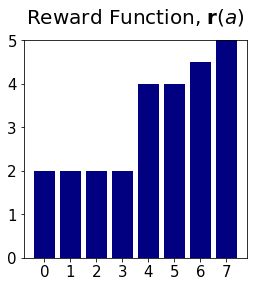

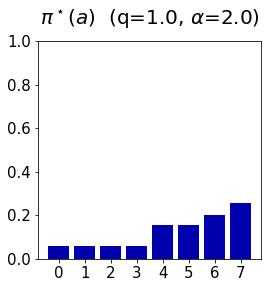

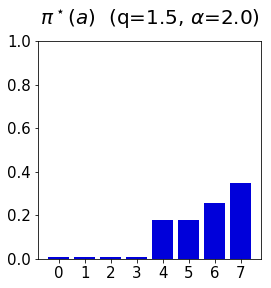

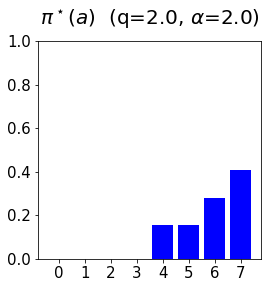

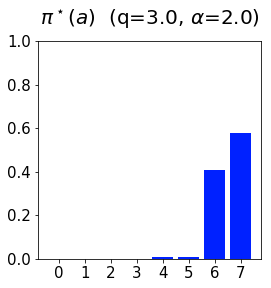

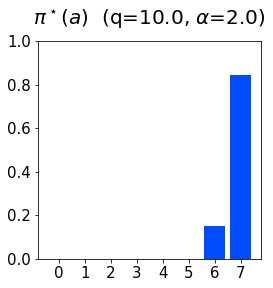

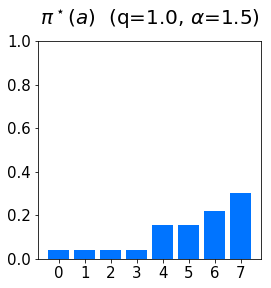

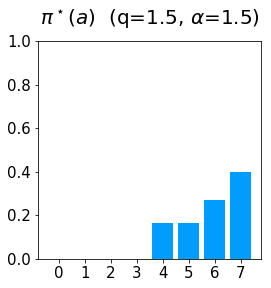

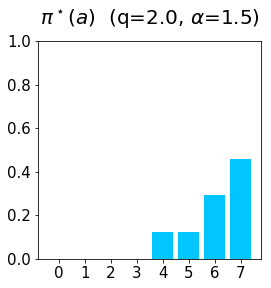

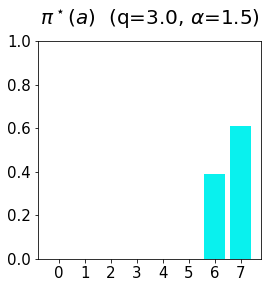

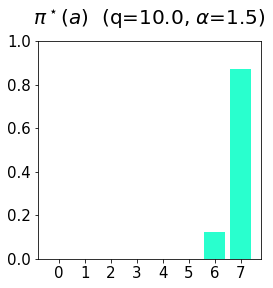

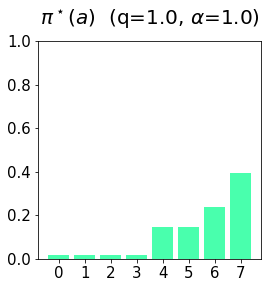

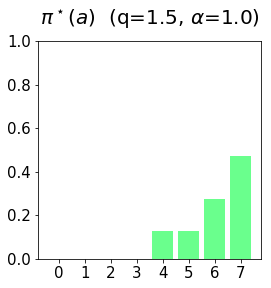

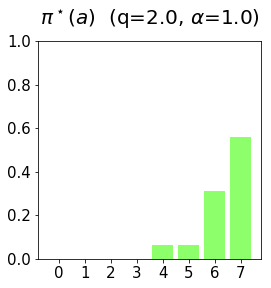

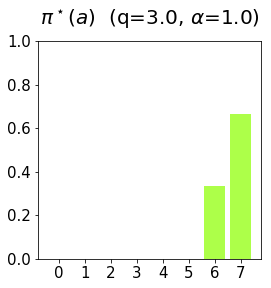

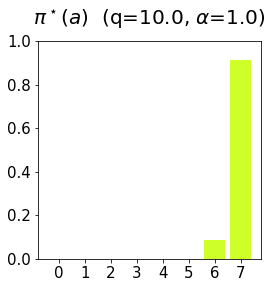

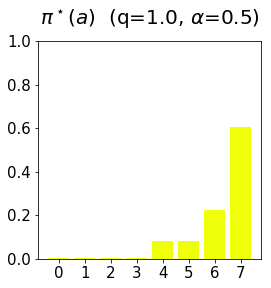

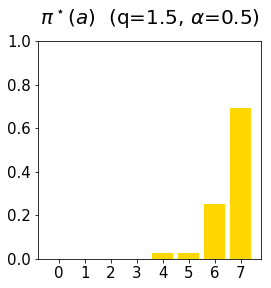

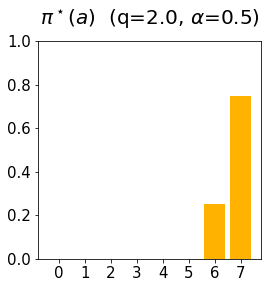

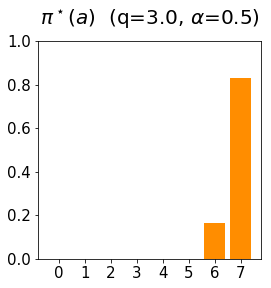

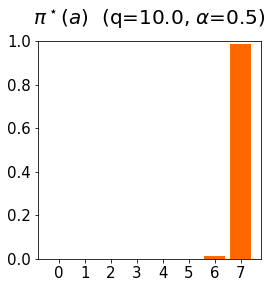

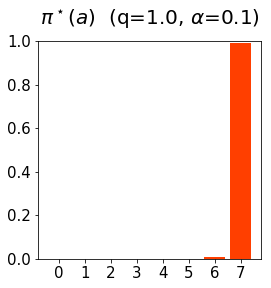

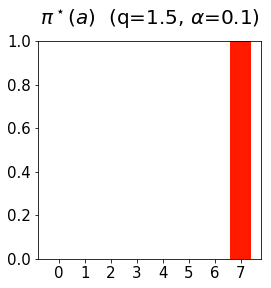

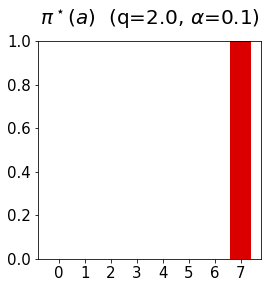

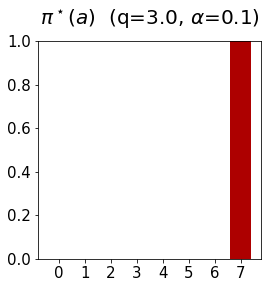

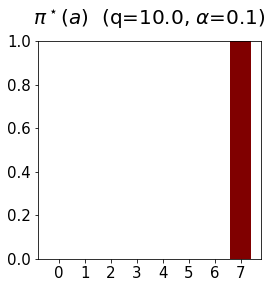

In [45]:
np.random.seed(0)
k = 8
max_q_logits = 5
q_logits = max_q_logits*np.concatenate([0.4*np.ones([1,4]),0.8*np.ones([1,2]),0.9*np.ones([1,1]),[[1]]],axis=1)

temp_list = [2.0,1.5,1.0,5e-1,1e-1]
q_list = [1.0,1.5,2.0,3.0,10.0]
cmap = cm.get_cmap('jet')
color_list=cmap(np.linspace(0,1,len(q_list)*len(temp_list)+1))

plt.figure(figsize=(4,4))
# plt.subplot(int((len(temp_list)+1)/1),int((len(q_list)+1)/1),1)
plt.title(r"Reward Function, $\mathbf{r}(a)$",size=BIGGER_SIZE,y=1.05)
plt.bar(np.arange(k),q_logits[0],align='center',color=color_list[0])
plt.ylim([0,max_q_logits])
plt.xticks(np.arange(k))
plt.savefig('./figs/bandit_rew.png')
plt.show()

for temp_idx in range(len(temp_list)):
    temp = temp_list[temp_idx]

    for q_idx in range(len(q_list)):
        q = q_list[q_idx]
        _, p = np_max_q(q_logits/temp,q=2.-q)
        plt.figure(figsize=(4,4))
#         plt.subplot(int((len(temp_list)+1)/1),int((len(q_list)+1)/1),temp_idx*(len(q_list)+1)+q_idx+2)
        plt.title(r"$\pi^\star(a)$  (q={q}, $\alpha$={a})".format(q=q,a=temp),size=BIGGER_SIZE,y=1.05)
        plt.bar(np.arange(k),p[0],align='center',color=color_list[temp_idx*len(q_list)+q_idx+1])
        plt.ylim([0,1])
        plt.xticks(np.arange(k))
        plt.savefig('./figs/bandit_q_{:.01f}_a_{:.01f}.png'.format(q,temp))
        plt.show()

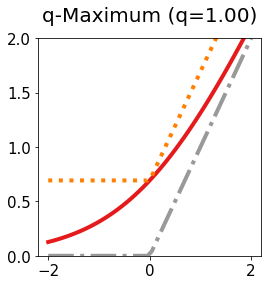

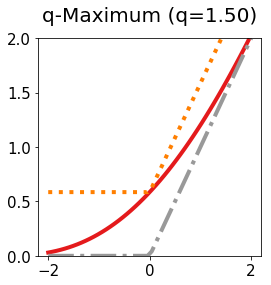

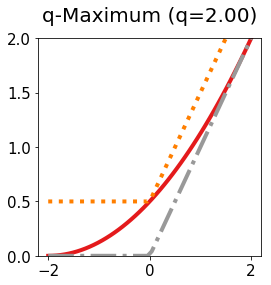

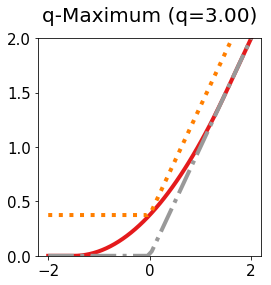

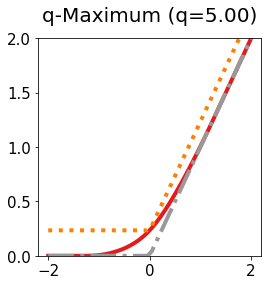

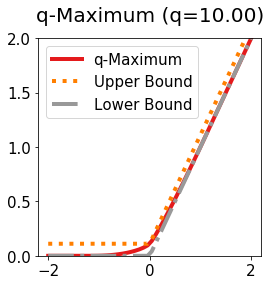

In [71]:
x1 = np.linspace(-2,2,50)
x1 = x1[:,np.newaxis]
x_logits = np.concatenate([x1,np.zeros_like(x1)],axis=1)

max_val = np.max(x_logits,axis=1)

cmap = cm.get_cmap("Set1")
color_list=cmap(np.linspace(0,1.0,3))

q_list = [1.0,1.5,2.0,3.0,5.0,10.0]
for i in range(len(q_list)):
    plt.figure(figsize=(4,4))
    q=q_list[i]
    max_q_val,_ = np_max_q(x_logits,q=2.-q)
#     plt.subplot('2'+str(int((len(q_list)+1)/2))+str(i+1))
    plt.plot(x1,max_q_val,label="q-Maximum",color=color_list[0],lw=4)
    plt.plot(x1,max_val-np_log_q(np.array(1/2),q=2.-q),label="Upper Bound",color=color_list[1],linestyle=":",lw=4)
    plt.plot(x1,max_val,label="Lower Bound",color=color_list[2],linestyle="-.",lw=4)
    plt.title("q-Maximum (q={:.02f})".format(q),size=BIGGER_SIZE,y=1.05)
    plt.ylim([0,2])
    if i == len(q_list)-1:
        plt.legend()
    # plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.savefig('./figs/q_max_q_{:.01f}.png'.format(q))
    plt.show()